In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.uniform(-1,1,100000)
y = X**2
real_data = np.stack([X,y],axis=1).astype("float32")

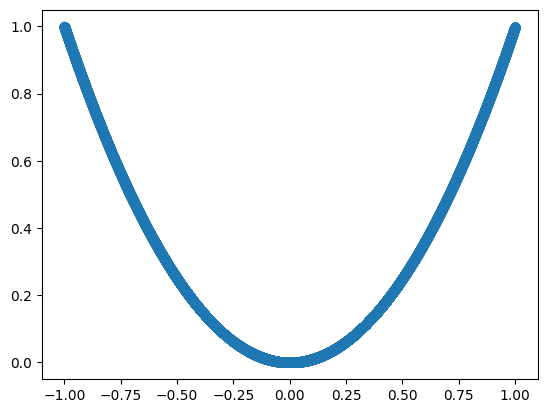

In [3]:
plt.scatter(X,y,alpha=0.5)
plt.show()

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
real_tensor = torch.tensor(real_data)

In [5]:
class Generator(nn.Module):
  def __init__(self, hidden_1= 16 , hidden_2=8):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(10,hidden_1),
        nn.LeakyReLU(0.2),
        nn.Linear(hidden_1,hidden_2),
        nn.LeakyReLU(0.2),
        nn.Linear(hidden_2,2)
    )
  def forward(self,x):
    return self.model(x)

class Discriminator(nn.Module):
  def __init__(self, hidden_1 = 16, hidden_2 =8):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(2,hidden_1),
        nn.LeakyReLU(0.2),
        nn.Linear(hidden_1,hidden_2),
        nn.LeakyReLU(0.2),
        nn.Linear(hidden_2,2),
    )
    self.out = nn.Sequential(
        nn.Linear(2,1),
        nn.Sigmoid()
    )
  def forward(self,x):
    x = self.model(x)
    return self.out(x)

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 128
epochs = 10000
D = Discriminator().to(device)
G = Generator().to(device)

In [31]:
criterion = nn.BCELoss()
d_optimizer = optim.Adam(D.parameters(), lr=0.001)
g_optimizer = optim.Adam(G.parameters(), lr=0.001)

Step 1000, D Loss: 1.2988, G Loss: 0.9016


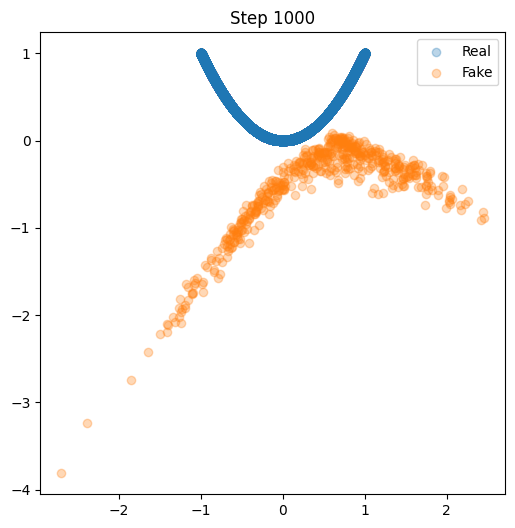

Step 2000, D Loss: 1.3620, G Loss: 0.7653


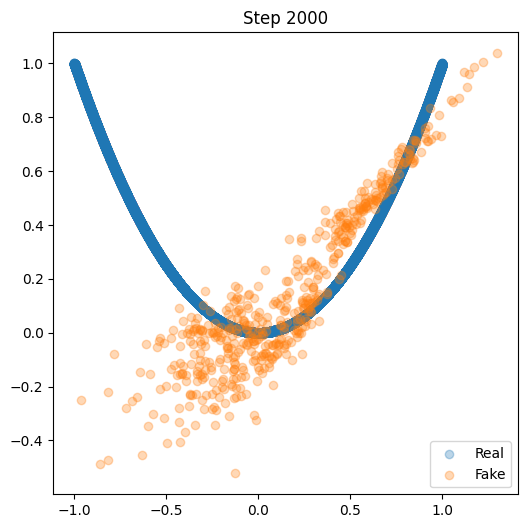

Step 3000, D Loss: 1.3816, G Loss: 0.6921


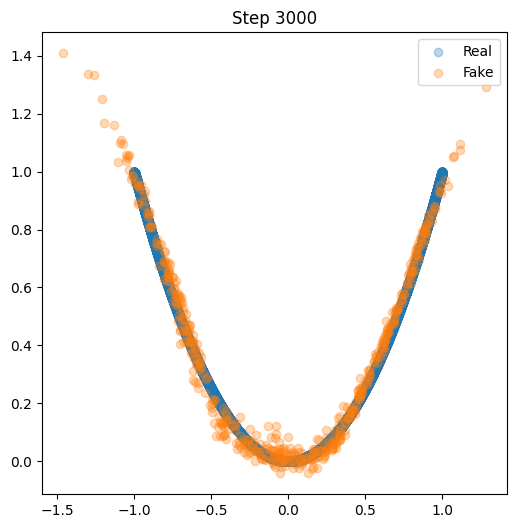

Step 4000, D Loss: 1.3949, G Loss: 0.6725


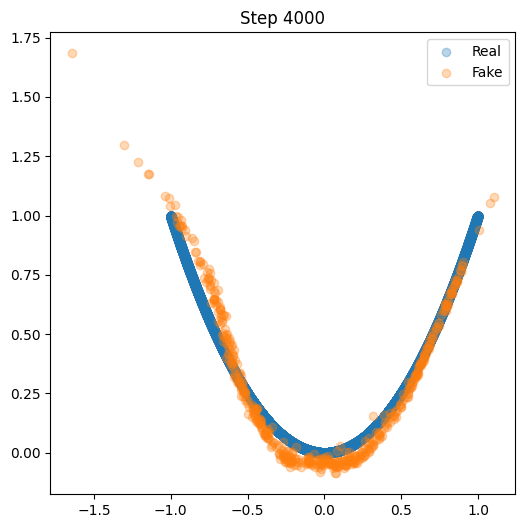

Step 5000, D Loss: 1.3886, G Loss: 0.6862


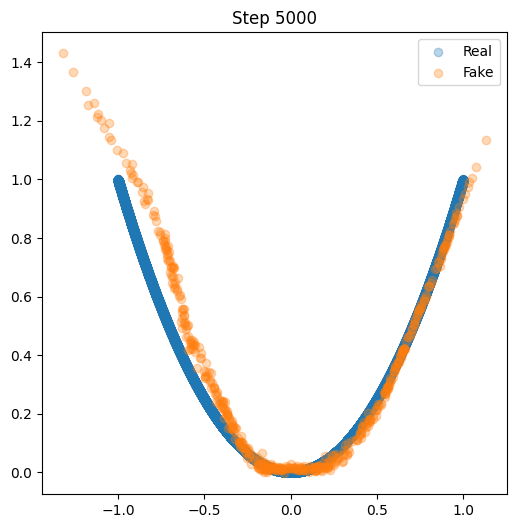

Step 6000, D Loss: 1.3805, G Loss: 0.6988


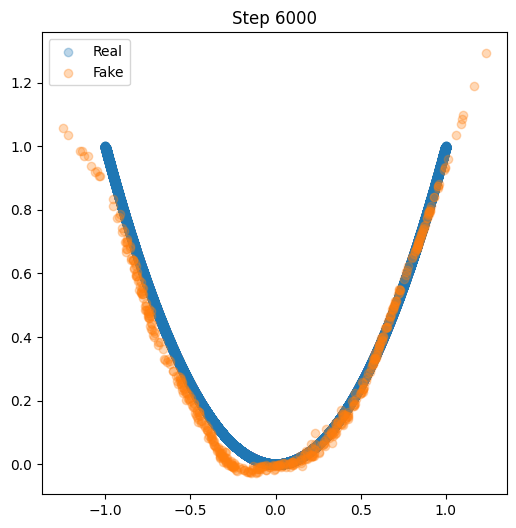

Step 7000, D Loss: 1.3809, G Loss: 0.6971


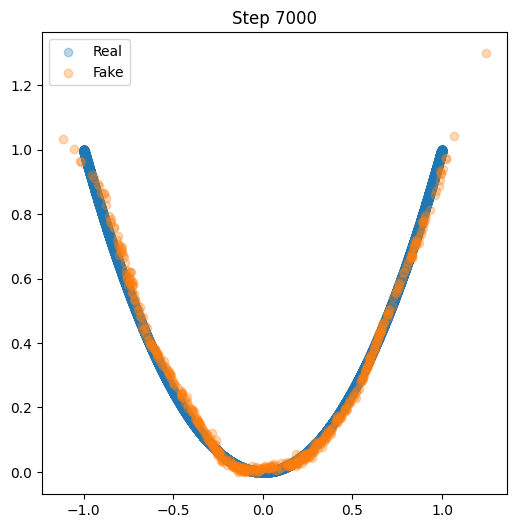

Step 8000, D Loss: 1.3916, G Loss: 0.7048


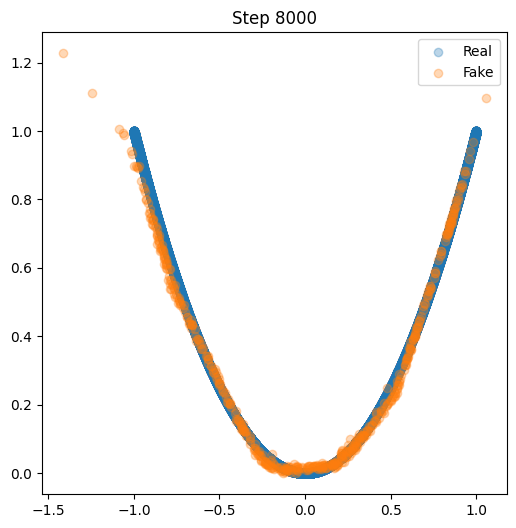

Step 9000, D Loss: 1.3856, G Loss: 0.6789


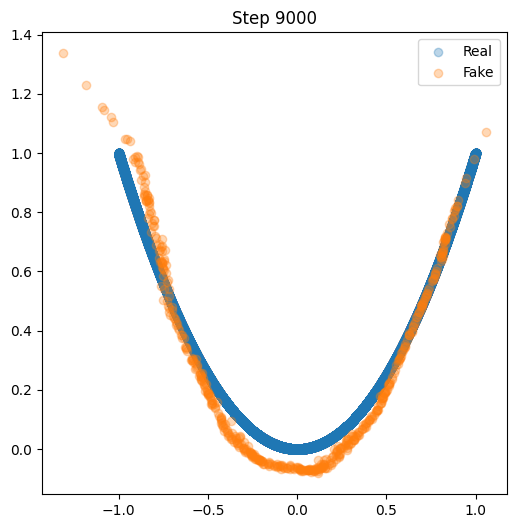

Step 10000, D Loss: 1.3874, G Loss: 0.6969


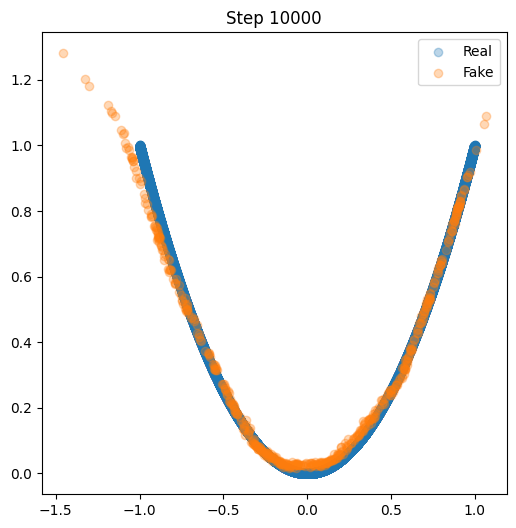

In [32]:
g_losses, d_losses = [], []
for step in range(1, epochs+1):
    idx = np.random.randint(0, real_data.shape[0], batch_size)
    real_batch = real_tensor[idx].to(device)

    real_labels = torch.ones((batch_size, 1), device=device)
    fake_labels = torch.zeros((batch_size, 1), device=device)

    # Train Discriminator
    z = torch.randn(batch_size, 10, device=device)
    fake_batch = G(z)
    D_real = D(real_batch)
    D_fake = D(fake_batch.detach())

    d_loss_real = criterion(D_real, real_labels)
    d_loss_fake = criterion(D_fake, fake_labels)
    d_loss = d_loss_real + d_loss_fake

    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()

    # Train Generator
    z = torch.randn(batch_size, 10, device=device)
    fake_batch = G(z)
    D_fake = D(fake_batch)
    g_loss = criterion(D_fake, real_labels)

    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()


    g_losses.append(g_loss.item())
    d_losses.append(d_loss.item())

    if step % 1000 == 0:
        print(f"Step {step}, D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")
        with torch.no_grad():
            z = torch.randn(500, 10, device=device)
            fake_samples = G(z).cpu().numpy()
        plt.figure(figsize=(6,6))
        plt.scatter(real_data[:,0], real_data[:,1], alpha=0.3, label="Real")
        plt.scatter(fake_samples[:,0], fake_samples[:,1], alpha=0.3, label="Fake")
        plt.legend()
        plt.title(f"Step {step}")
        plt.show()

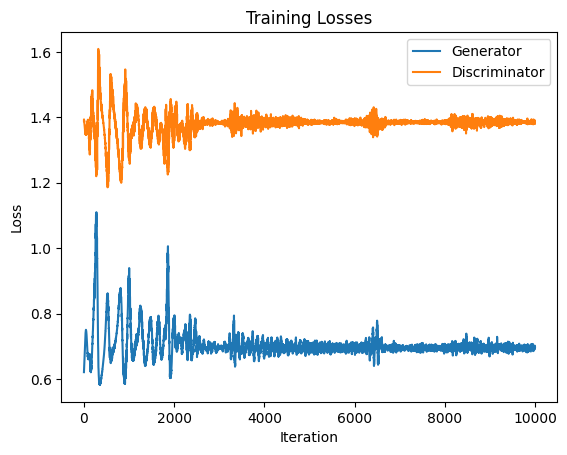

In [33]:
plt.plot(g_losses, label="Generator")
plt.plot(d_losses, label="Discriminator")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Losses")
plt.show()